# Immigrants in CA - JTF
#### A repo containing the code and data to reproduce the numbers in PPIC's Immigrants in CA JTF

<details>
    <summary><strong>Goal</strong></summary>
    "The goal of this notebook is to ..."
    <ul>
        <li> measurable goals for this notebook </li>
        <li> Ex 1: Identify <i>variables of interest in dataset <strong>name.dta</strong></i> </li>
        <li> Ex 2: Create a <i>working dataset</i> from raw data.</li>
    </ul>
</details>

<details>
    <summary><strong>Context</strong></summary>
    Context at the moment (i.e. "We've downloaded raw data from <strong><i>website.com</i></strong> and are now in the process of creating a mastefile.")
    <li> What is the final goal of this project?</li>
    <li> What are we trying to recreate? Where are we in the process?</li>
    <li> Any links to documentation / figures.</li>
</details>

In [1]:
import pandas as pd
import gzip
from pathlib import Path
from tools import tree
from datetime import datetime as dt
today = dt.today().strftime("%d-%b-%y")

today

'08-Jan-20'

In [2]:
RAW_DATA = Path("../data/raw/")
INTERIM_DATA = Path("../data/interim/")
PROCESSED_DATA = Path("../data/processed/")
FINAL_DATA = Path("../data/final/")

In [3]:
tree(RAW_DATA)

+ ..\data\raw
    + usa_00070.dta.gz


In [4]:
with gzip.open(RAW_DATA / 'usa_00070.dta.gz', 'r') as file:
    data = pd.read_stata(file)

In [5]:
data.head()

,year,sample,serial,cbserial,hhwt,cluster,statefip,strata,gq,pernum,perwt,age,bpl,bpld,citizen,yrsusa2,migplac1
0,2006,2006 acs,65923,2.0,65,2.006001e+12,california,541606,households under 1970 definition,1,65,37,california,california,n/a,n/a,n/a
1,2006,2006 acs,65923,2.0,65,2.006001e+12,california,541606,households under 1970 definition,2,72,9,california,california,n/a,n/a,n/a
2,2006,2006 acs,65923,2.0,65,2.006001e+12,california,541606,households under 1970 definition,3,71,6,california,california,n/a,n/a,n/a
3,2006,2006 acs,65923,2.0,65,2.006001e+12,california,541606,households under 1970 definition,4,67,36,california,california,n/a,n/a,n/a
4,2006,2006 acs,65924,16.0,59,2.006001e+12,california,811506,households under 1970 definition,1,60,49,minnesota,minnesota,n/a,n/a,n/a


In [6]:
columns_of_interest = ['year', 'perwt', 'statefip', 'migplac1', 'citizen', 'bpld']

In [7]:
working_data = data[columns_of_interest].copy()

In [8]:
for index,category in enumerate(working_data['migplac1'].cat.categories):
    print(f"{index}.\t{category}")

0.	n/a
1.	alabama
2.	alaska
3.	arizona
4.	arkansas
5.	california
6.	colorado
7.	connecticut
8.	delaware
9.	district of columbia
10.	florida
11.	georgia
12.	hawaii
13.	idaho
14.	illinois
15.	indiana
16.	iowa
17.	kansas
18.	kentucky
19.	louisiana
20.	maine
21.	maryland
22.	massachusetts
23.	michigan
24.	minnesota
25.	mississippi
26.	missouri
27.	montana
28.	nebraska
29.	nevada
30.	new hampshire
31.	new jersey
32.	new mexico
33.	new york
34.	north carolina
35.	north dakota
36.	ohio
37.	oklahoma
38.	oregon
39.	pennsylvania
40.	rhode island
41.	south carolina
42.	south dakota
43.	tennessee
44.	texas
45.	utah
46.	vermont
47.	virginia
48.	washington
49.	west virginia
50.	wisconsin
51.	wyoming
52.	puerto rico
53.	other us possessions
54.	canada
55.	mexico
56.	el salvador
57.	guatemala
58.	honduras
59.	central america, nec
60.	cuba
61.	dominican republic
62.	haiti
63.	jamaica
64.	other caribbean and north america
65.	brazil
66.	colombia
67.	ecuador
68.	peru
69.	venezuela
70.	south america, nec


In [9]:
mask_state = working_data['statefip'] == 'california'
mask_latam = (working_data['migplac1'] >= 'mexico') & (working_data['migplac1'] <= 'south america, nec')
mask_asia = (working_data['migplac1'] >= 'china') & (working_data['migplac1'] <= 'asia, nec')
mask_newlyarrivals = working_data['migplac1'] >= 'canada'

In [10]:
california = working_data[mask_state & mask_newlyarrivals].copy()

In [11]:
california.loc[mask_latam, 'place of origin'] = 'Latin America'
california.loc[mask_asia, 'place of origin'] = 'Asia'
california['place of origin'].fillna('Other', inplace = True)

In [12]:
california.head()

,year,perwt,statefip,migplac1,citizen,bpld,place of origin
145,2006,74,california,other western asia,n/a,california,Asia
146,2006,68,california,other western asia,n/a,california,Asia
487,2006,75,california,china,not a citizen,china,Asia
1020,2006,95,california,india,not a citizen,india,Asia
1021,2006,76,california,india,not a citizen,india,Asia


In [13]:
time_series = california.groupby(['year', 'place of origin']).agg({'perwt': 'sum'})
time_series.reset_index(inplace = True)

In [14]:
time_series.head()

,year,place of origin,perwt
0,2006,Asia,118730.0
1,2006,Latin America,111909.0
2,2006,Other,54210.0
3,2007,Asia,111923.0
4,2007,Latin America,82811.0


# Chart

In [15]:
import altair as alt

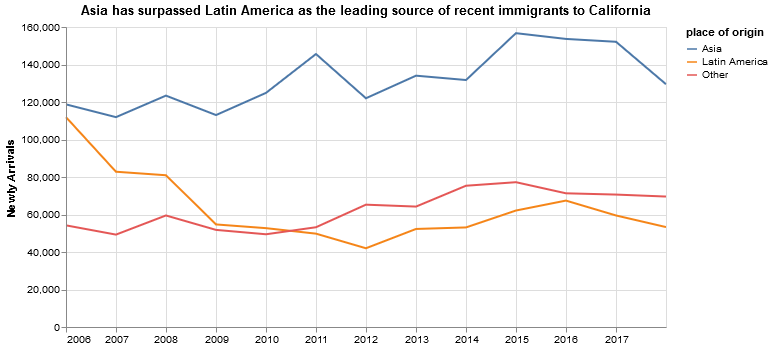

In [17]:
alt.Chart(time_series).mark_line().encode(
    x = alt.X('year:T', axis = alt.Axis(title = "")),
    y = alt.Y('perwt:Q', axis = alt.Axis(title = "Newly Arrivals")),
    color = alt.Color("place of origin:N",)
).properties(
    title = "Asia has surpassed Latin America as the leading source of recent immigrants to California",
    width = 600
)

[**Other notebook**](00_bullet_4_text.ipynb)